In [2]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = open('Day 13.txt').read().rstrip()
first, second = file.split('\n\n')
D = [] # coordinates of all original marked dots
for row in first.split('\n'):
    x, y = row.split(',')
    D.append((int(x), int(y)))
    
L = re.findall(r'[xy]=\d+', second)
INS = [] # fold instructions
for l in L:
    m, n = l.split('=')
    INS.append([m, int(n)])

In [4]:
for ins in INS:
    D2 = set()
    if ins[0] == 'x': # 对称轴是一条竖线，竖线左侧的点保持不变
        for d in D:
            if d[0] < ins[1]: # d[0]表示x的坐标，d[1]表示y的坐标
                D2.add(d)
            elif d[0] > ins[1]:
                new_x = 2*ins[1] - d[0]
                D2.add((new_x, d[1]))
    elif ins[0] == 'y':
        for d in D:
            if d[1] < ins[1]: # d[0]表示x的坐标，d[1]表示y的坐标
                D2.add(d)
            elif d[1] > ins[1]:
                new_y = 2*ins[1] - d[1]
                D2.add((d[0], new_y))
    D = list(D2)

In [5]:
X = []
Y = []
for d in list(D2):
    X.append(d[0])
    Y.append(-d[1])

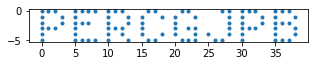

In [6]:
plt.figure(figsize=(5, 0.6))
plt.plot(X, Y, '.')